# **The goal is to perform UMAP analyses ** 

Here, analyses are done on CLR OTU tables (transformed) with all OTUs.

Install dependencies *via* pip

In [ ]:
!pip install umap-learn 
!pip install umap-learn[plot]

**Import the different libraries for UMAP analyses**

*Notes on these librairies:* %matplotlib inline : configuration for next graphs; numpy : for arrays (matrices in our case); scipy : provides more utility functions (based on numpy) ; pandas : for mathematical operations ; networkx : for networks ; matplotlib.pyplot : for data visualization ; seaborn : for statistical data visualization (based on matplotlib) ; UMAP = Uniform Manifold Approximation and Projection

In [ ]:
%matplotlib inline 
import numpy as np    
import scipy as sp   
import pandas as pd     
import networkx as nx     
import matplotlib.pyplot as plt    
import seaborn as sns   
from mpl_toolkits.mplot3d import Axes3D
import umap
import umap.plot

**Import the CLR OTU table** 

The path should be ./data_modified/otu_clr.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving otu_clr.csv to otu_clr.csv


In [ ]:
otu_clr = pd.read_csv (r'otu_clr.csv')

In [ ]:
otu_clr.head()

**Follow instructions** from "Basic UMAP Parameters" from https://umap-learn.readthedocs.io/en/latest/parameters.html

In [ ]:
np.random.seed(42)
otu_clr = np.random.rand(800, 4)

In [ ]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [ ]:
fit = umap.UMAP()
test = umap.UMAP().fit_transform(otu_clr)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'UMAP of normalized OTU data with random colours (seed 42, random.rand(800,4))')

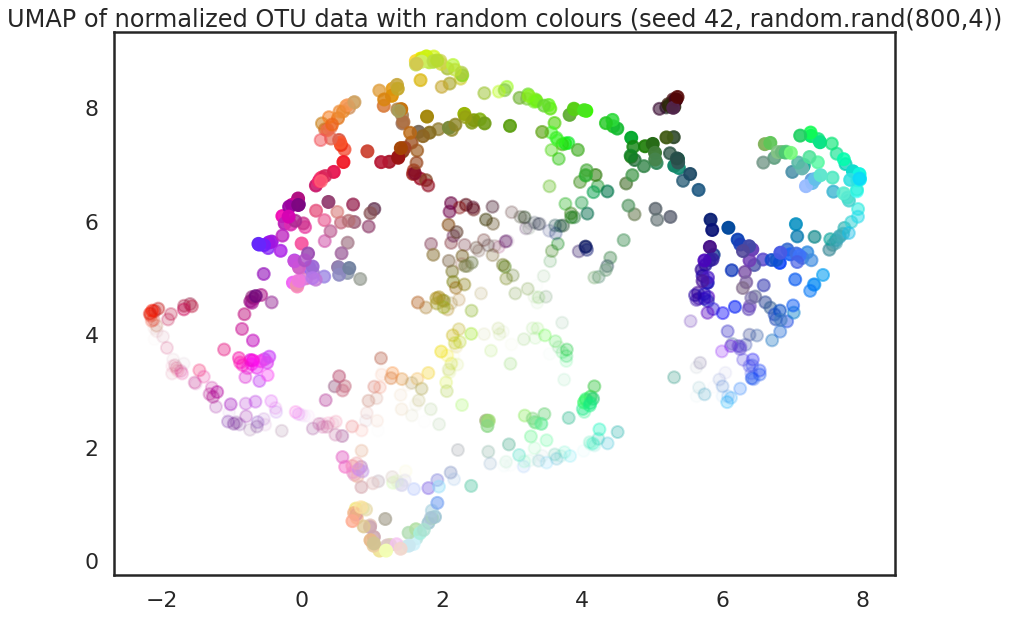

In [ ]:
plt.scatter(test[:,0], test[:,1], c=otu_clr)
plt.title('UMAP of normalized OTU data with random colours (seed 42, random.rand(800,4))')


Try with the 3D to have a better idea ? (both SN and CN)
First : need to adapt the draw_umap function as followed (with test and otu_clr)

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    test = fit.fit_transform(otu_clr);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(test[:,0], range(len(u)), c=otu_clr)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(test[:,0], test[:,1], c=otu_clr)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(test[:,0], test[:,1], test[:,2], c=otu_clr, s=100)
    plt.title(title, fontsize=18)

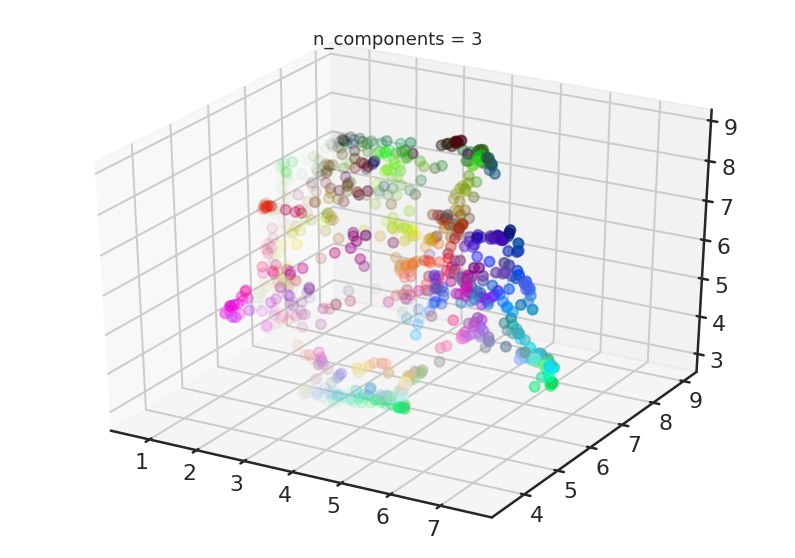

In [ ]:
draw_umap(n_components=3, title='n_components = 3')

This representation was just a test, it finally doesn't help us to see clearer how it is

**Plot it with Samples** (only 2 colors to visualize how they are distributed.) 

From otu_clr, transverse samples with OTUs

In [ ]:
otu_clr_trans = pd.read_csv(r'otu_clr.csv')

In [ ]:
otu_clr_trans = otu_clr_trans.transpose()

In [ ]:
otu_clr_trans.head()

Transform the otu_clr_trans dataframe into a csv file and then, save it

In [ ]:
otu_clr_trans.to_csv(r'otu_clr_trans.csv', index = True) 

**Test again UMAP with otu_clr_trans**

In [ ]:
np.random.seed(33)
otu_clr_trans_c2 = np.random.rand(66,1)

In [ ]:
fit = umap.UMAP()
test_trans2 = umap.UMAP().fit_transform(otu_clr_trans_c2)

Text(0.5, 1.0, 'UMAP of normalized data (transposed) - seeds = 33, randomrand(66,1)')

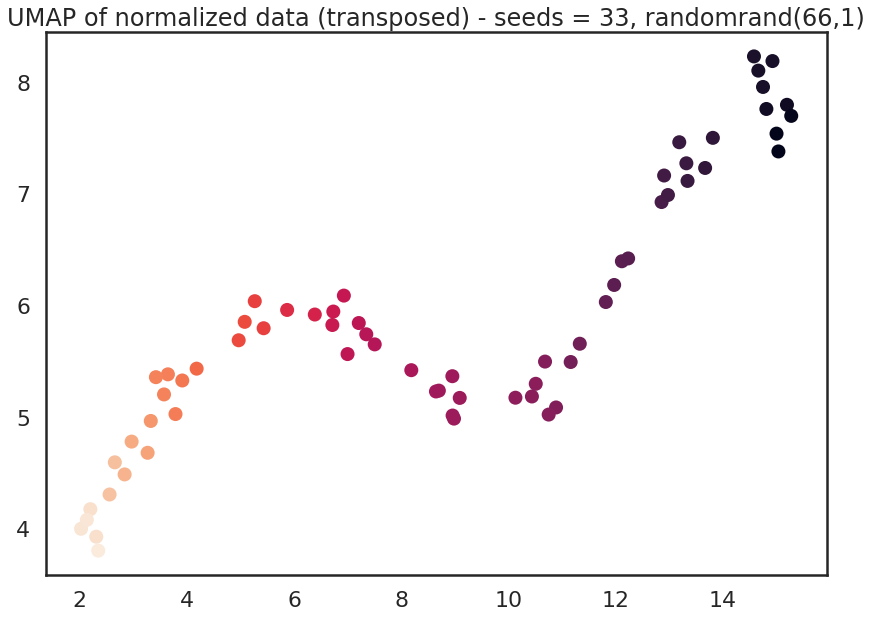

In [ ]:
plt.scatter(test_trans2[:,0], test_trans2[:,1], c=otu_clr_trans_c2)
plt.title('UMAP of normalized data (transposed) - seeds = 33, randomrand(66,1)')

# **The following steps didn't allow us to color samples into 2 colors, but I let the codes in case it could give you some ideas**

From the otu_clr_trans matrix, try to make 2 new matrices with CN or SN

In [ ]:
print(otu_clr_trans_c2)

In [ ]:
mat_CN = otu_clr.filter(regex='CN')
print(mat_CN)

In [ ]:
mat_SN = otu_clr_trans.filter(regex='SN')
print(mat_SN)

In [ ]:
np.random.seed(33)
test_col = np.random.rand(58136)

In [ ]:
fit = umap.UMAP()
test_CN = umap.UMAP().fit_transform(mat_CN)

In [ ]:
otu_SN = np.random.rand(1)
test_SN = umap.UMAP().fit_transform(mat_CN)

In [ ]:
mat_CN

In [ ]:
plt.scatter(test_CN[:,0], test_CN[:,1], c=test_col)
plt.title('UMAP of otu CLR - CN)')

In [ ]:
plt.scatter(test_SN[:,0], test_SN[:,1], c=test_col)
plt.title('UMAP of otu CLR - SN)')

Gives the same result, whatever CN or SN is entered

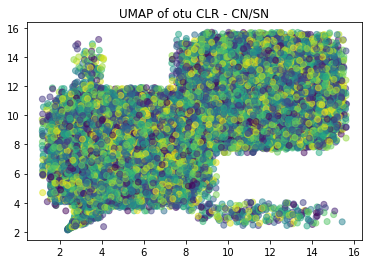

In [ ]:
plt.scatter(test_SN, test_CN, c=test_col, alpha=0.5)
plt.title('UMAP of otu CLR - CN/SN')
plt.show()

In [ ]:
test_CN2 = umap.UMAP().fit(otu_clr_trans)
umap.plot.points(mat_CN)

In [ ]:
test_CN2 = umap.UMAP().fit(mat_CN)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


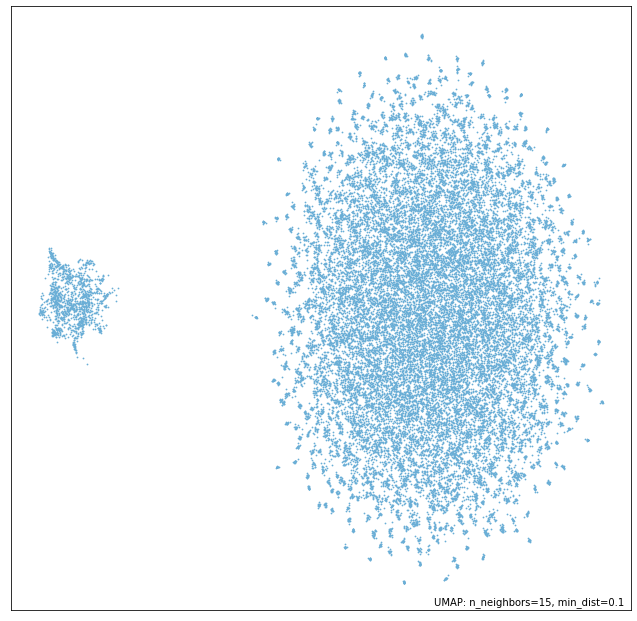

In [ ]:
umap.plot.points(test_CN2)

In [ ]:
test_SN2 = umap.UMAP().fit(mat_SN)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


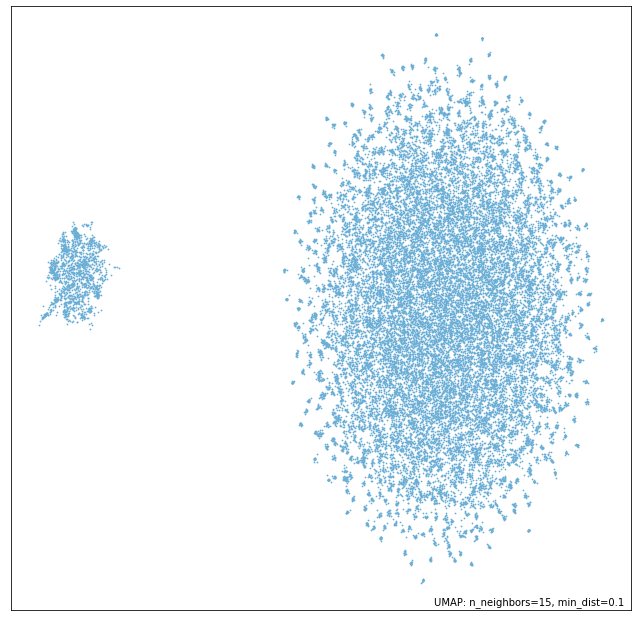

In [ ]:
umap.plot.points(test_SN2)

In [ ]:
umap.plot.points(test_CN2, test_SN2, labels=otu_SN)

## **Create the dictionnary of colors**

In [ ]:
!pip install colordict

In [ ]:
from colordict import *

colors = ColorDict()
red = colors['red']
blue = colors['blue']

Create dictionnaries of samples names depending on soils 

In [ ]:
dico_CN = {"CN.CO1.S0.R1" : "red","CN.CO1.S0.R2": "red","CN.CO1.S0.R3": "red","CN.CO1.S2.R1": "red","CN.CO1.S2.R2": "red","CN.CO1.S2.R3": "red","CN.CO1.S5.R1": "red","CN.CO1.S5.R2": "red","CN.CO1.S5.R3": "red","CN.CO1.S7.R1": "red","CN.CO1.S7.R2": "red","CN.CO1.S7.R3": "red","CN.CO2.S2.R1": "red","CN.CO2.S2.R2": "red","CN.CO2.S2.R3": "red","CN.CO2.S5.R1": "red","CN.CO2.S5.R2": "red","CN.CO2.S5.R3": "red","CN.CO2.S7.R1": "red","CN.CO2.S7.R2": "red","CN.CO2.S7.R3": "red","CN.CO3.S0.R1": "red","CN.CO3.S0.R2": "red","CN.CO3.S0.R3": "red","CN.CO3.S2.R1": "red","CN.CO3.S2.R2": "red","CN.CO3.S5.R1": "red","CN.CO3.S5.R2": "red","CN.CO3.S5.R3": "red","CN.CO3.S7.R1": "red","CN.CO3.S7.R2": "red","CN.CO3.S7.R3": "red","CN.CO3.S2.R3": "red"}

In [ ]:
dico_SN ={"SN.CO1.S0.R1" : "blue","SN.CO1.S0.R2" : "blue","SN.CO1.S0.R3" : "blue","SN.CO1.S2.R1" : "blue","SN.CO1.S2.R2" : "blue","SN.CO1.S2.R3" : "blue","SN.CO1.S5.R1" : "blue","SN.CO1.S5.R2" : "blue","SN.CO1.S5.R3" : "blue","SN.CO1.S7.R1" : "blue","SN.CO1.S7.R2" : "blue","SN.CO1.S7.R3" : "blue","SN.CO2.S2.R1" : "blue","SN.CO2.S2.R2" : "blue","SN.CO2.S2.R3" : "blue","SN.CO2.S5.R1" : "blue","SN.CO2.S5.R2" : "blue","SN.CO2.S5.R3" : "blue","SN.CO2.S7.R1" : "blue","SN.CO2.S7.R2" : "blue","SN.CO2.S7.R3" : "blue","SN.CO3.S0.R1" : "blue","SN.CO3.S0.R2" : "blue","SN.CO3.S0.R3" : "blue","SN.CO3.S2.R1" : "blue","SN.CO3.S2.R2" : "blue","SN.CO3.S2.R3" : "blue","SN.CO3.S5.R1" : "blue","SN.CO3.S5.R2" : "blue","SN.CO3.S5.R3" : "blue","SN.CO3.S7.R1" : "blue","SN.CO3.S7.R2" : "blue","SN.CO3.S7.R3" : "blue"}

Associate a color to CN/SN dictionnaries

In [ ]:
from collections import ChainMap

In [ ]:
dico_c = dict(ChainMap(dico_CN, dico_SN))
print("Merge two dictionaries", dico_c)

In [ ]:
map = umap.UMAP().fit(otu_clr_trans_c2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


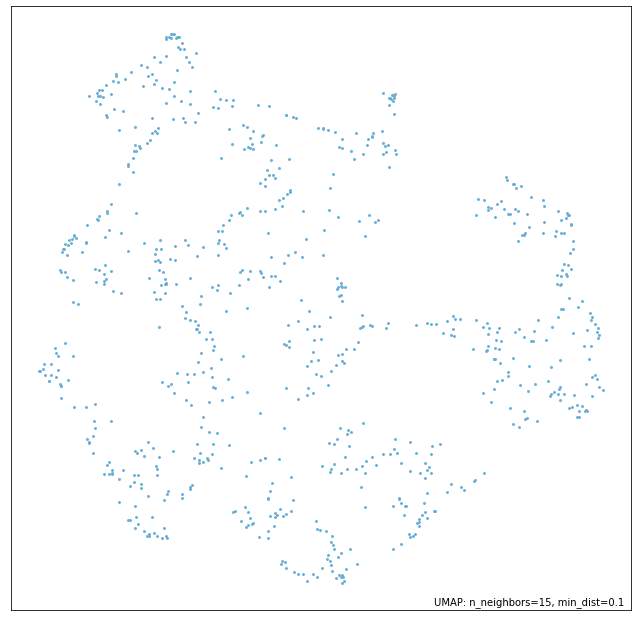

In [ ]:
umap.plot.points(map)